In [1]:
import os
import pandas as pd
import numpy as np
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC, SVR
from sklearn.metrics import accuracy_score, mean_squared_error

data_dir = '/content/content/MyDrive/data/titanic'

drive.mount('content')
os.chdir(data_dir)
os.listdir()

Mounted at content


['train.csv',
 'gender_submission.csv',
 'test.csv',
 'titanic.zip',
 'test_1hot.csv',
 'train_1hot.csv']

# __Overfitting and underfitting__
- Overfitting occurs when a model learns noise along with patterns, reducing generalization to new data.  
- Underfitting happens when a model is too simple, failing to capture underlying data patterns.  
- Overfitting leads to high training accuracy but poor test performance, known as high variance.  
- Underfitting results in poor performance on both training and testing data, referred to as high bias.  
- Proper model tuning is essential to balance overfitting and underfitting for optimal results.  

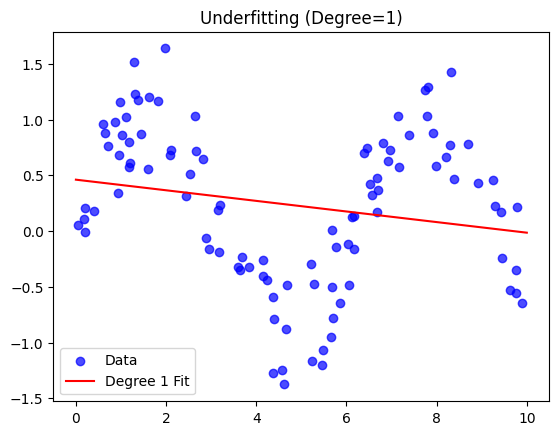

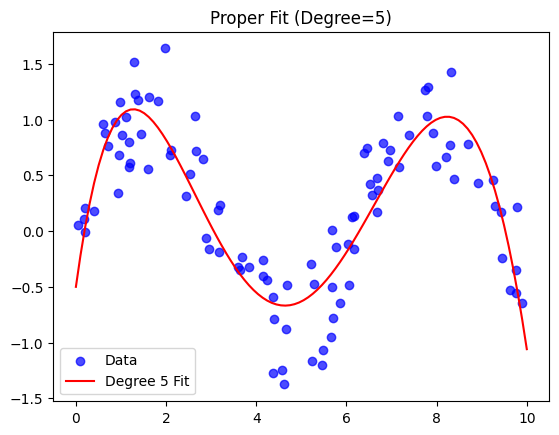

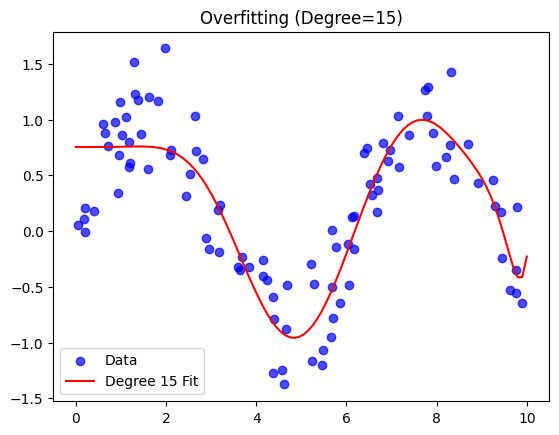

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Generate synthetic data
np.random.seed(0)
X = np.random.uniform(0, 10, 100).reshape(-1, 1)  # Random X values
y = np.sin(X).flatten() + np.random.normal(0, 0.3, X.shape[0])  # Add noise to sine wave

# Function to plot results
def plot_results(X, y, model, degree, title):
    X_pred = np.linspace(0, 10, 100).reshape(-1, 1)  # Test data for smooth curve
    poly = PolynomialFeatures(degree)
    X_poly_pred = poly.fit_transform(X_pred)
    y_pred = model.predict(X_poly_pred)
    plt.scatter(X, y, color="blue", label="Data", alpha=0.7)
    plt.plot(X_pred, y_pred, color="red", label=f"Degree {degree} Fit")
    plt.legend()
    plt.title(title)
    plt.show()

# Underfitting (Low complexity model)
degree_underfit = 1  # Linear fit
poly_underfit = PolynomialFeatures(degree_underfit)
X_poly_underfit = poly_underfit.fit_transform(X)
model_underfit = LinearRegression().fit(X_poly_underfit, y)
plot_results(X, y, model_underfit, degree_underfit, "Underfitting (Degree=1)")

# Proper Fit (Moderate complexity model)
degree_proper = 5  # Polynomial fit
poly_proper = PolynomialFeatures(degree_proper)
X_poly_proper = poly_proper.fit_transform(X)
model_proper = LinearRegression().fit(X_poly_proper, y)
plot_results(X, y, model_proper, degree_proper, "Proper Fit (Degree=5)")

# Overfitting (High complexity model)
degree_overfit = 15  # Overly complex fit
poly_overfit = PolynomialFeatures(degree_overfit)
X_poly_overfit = poly_overfit.fit_transform(X)
model_overfit = LinearRegression().fit(X_poly_overfit, y)
plot_results(X, y, model_overfit, degree_overfit, "Overfitting (Degree=15)")

# __Addressing over or under fitting__
- **Collecting More Data**: Increases dataset size to help models generalize better and reduce overfitting.  
- **Feature Selection**: Eliminates irrelevant features to simplify the model and improve focus on key patterns.  
- **Feature Engineering**: Creates new informative features to enhance data representation and model accuracy.  
- **Applying Regularization**: Adds penalties to control complexity and reduce sensitivity to training noise.  
- **Balancing Bias and Variance**: Strikes a balance between underfitting (high bias) and overfitting (high variance).  
- **Visualizing Patterns**: Analyzes model predictions to identify areas of underperformance or unnecessary complexity.  
- **Testing on Unseen Data**: Evaluates robustness and generalization by assessing models on independent datasets.  

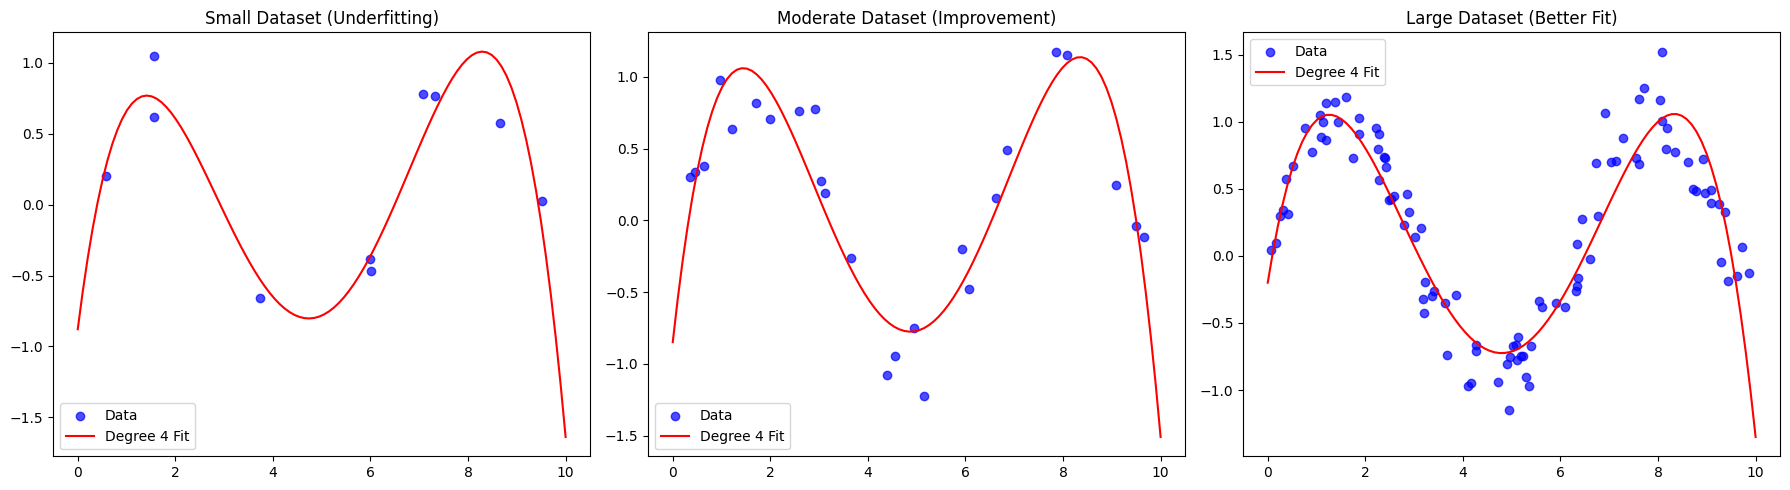

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Function to plot results
def plot_model(X, y, degree, title, ax):
    poly = PolynomialFeatures(degree)
    X_poly = poly.fit_transform(X)
    model = LinearRegression().fit(X_poly, y)
    X_pred = np.linspace(0, 10, 100).reshape(-1, 1)
    X_pred_poly = poly.transform(X_pred)
    y_pred = model.predict(X_pred_poly)
    ax.scatter(X, y, color="blue", label="Data", alpha=0.7)
    ax.plot(X_pred, y_pred, color="red", label=f"Degree {degree} Fit")
    ax.set_title(title)
    ax.legend()

# Step 1: Small Dataset
np.random.seed(42)
X_small = np.random.uniform(0, 10, 10).reshape(-1, 1)
y_small = np.sin(X_small).flatten() + np.random.normal(0, 0.2, X_small.shape[0])

# Step 2: Moderate Dataset
X_moderate = np.random.uniform(0, 10, 25).reshape(-1, 1)
y_moderate = np.sin(X_moderate).flatten() + np.random.normal(0, 0.2, X_moderate.shape[0])

# Step 3: Larger Dataset
X_large = np.random.uniform(0, 10, 100).reshape(-1, 1)
y_large = np.sin(X_large).flatten() + np.random.normal(0, 0.2, X_large.shape[0])

# Plot results
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

degree = 4  # Polynomial degree for all fits
plot_model(X_small, y_small, degree, "Small Dataset (Underfitting)", axes[0])
plot_model(X_moderate, y_moderate, degree, "Moderate Dataset (Improvement)", axes[1])
plot_model(X_large, y_large, degree, "Large Dataset (Better Fit)", axes[2])

plt.tight_layout()
plt.show()

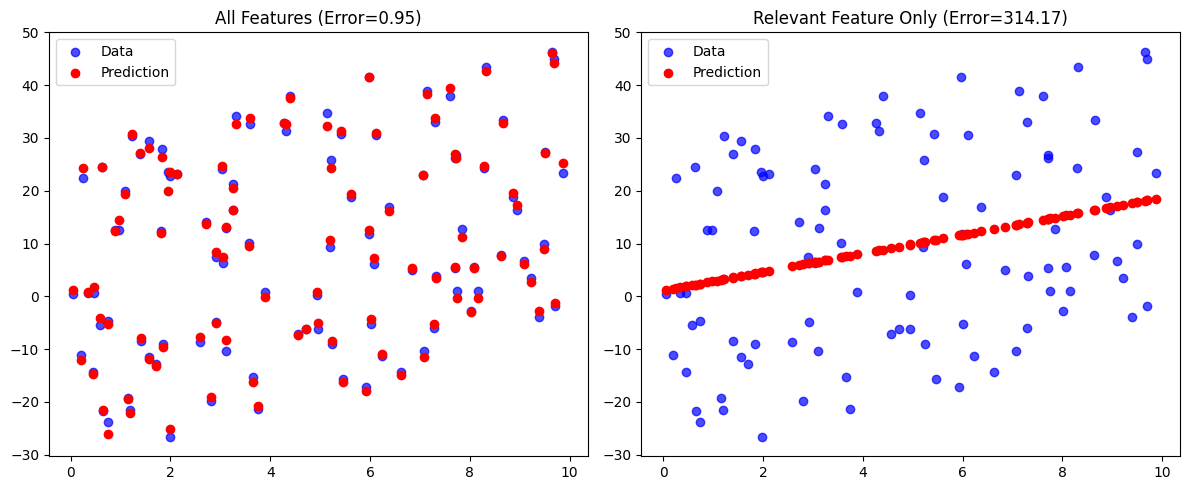

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Generate synthetic data
np.random.seed(42)
X_relevant = np.random.uniform(0, 10, 100).reshape(-1, 1)  # Relevant feature
X_irrelevant = 10 * np.random.uniform(-1, 1, 100).reshape(-1, 1)  # Amplified irrelevant feature
y = 2 * X_relevant.flatten() + np.random.normal(0, 1, 100)  # Target variable

# Introduce noise correlated with the irrelevant feature
y_with_noise = y + 3 * X_irrelevant.flatten()  # Misleading noise from the irrelevant feature

# Combine both features into a dataset
X_combined = np.hstack((X_relevant, X_irrelevant))  # Combine relevant and irrelevant features

# Train model using all features (including irrelevant ones)
model_all_features = LinearRegression().fit(X_combined, y_with_noise)
y_pred_all = model_all_features.predict(X_combined)
error_all_features = mean_squared_error(y_with_noise, y_pred_all)

# Train model using only the relevant feature
model_relevant_feature = LinearRegression().fit(X_relevant, y_with_noise)
y_pred_relevant = model_relevant_feature.predict(X_relevant)
error_relevant_feature = mean_squared_error(y_with_noise, y_pred_relevant)

# Visualize the results
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot model with all features
axes[0].scatter(X_relevant, y_with_noise, color="blue", label="Data", alpha=0.7)
axes[0].scatter(X_relevant, y_pred_all, color="red", label="Prediction")
axes[0].set_title(f"All Features (Error={error_all_features:.2f})")
axes[0].legend()

# Plot model with only relevant features
axes[1].scatter(X_relevant, y_with_noise, color="blue", label="Data", alpha=0.7)
axes[1].scatter(X_relevant, y_pred_relevant, color="red", label="Prediction")
axes[1].set_title(f"Relevant Feature Only (Error={error_relevant_feature:.2f})")
axes[1].legend()

plt.tight_layout()
plt.show()

# __Reguralization__
- **Lasso (L1 Regularization)**: Removes irrelevant features by shrinking their weights to zero, aiding simplicity.  
- **Ridge (L2 Regularization)**: Smoothly reduces large weights, retaining all features while controlling complexity.  
- **Elastic Net Regularization**: Combines L1 and L2 penalties for balanced feature selection and weight shrinking.  
- **Generalization**: All techniques simplify models, improving robustness and reducing overfitting risks.  
- **Scikit-learn Support**: Implements these regularization methods efficiently for practical machine learning tasks.  

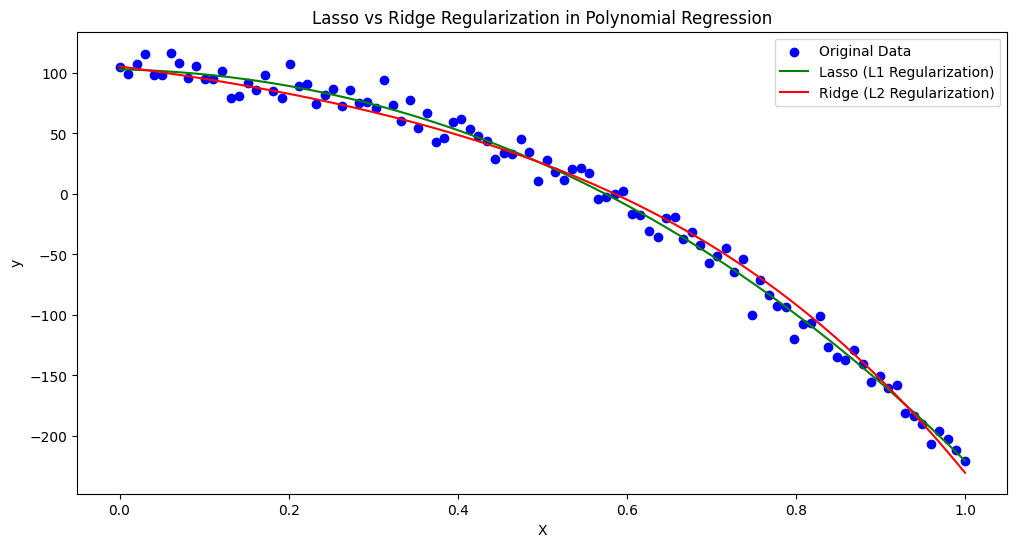

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso, Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Generate synthetic data
np.random.seed(42)
X = np.linspace(0, 1, 100).reshape(-1, 1)  # 100 data points between 0 and 1
y = 28*X**3 - 385*X**2 + 39*X + 100 + np.random.randn(100, 1) * 10  # Cubic relationship with noise

# Define polynomial degree
degree = 10

# Create pipeline for Lasso (L1 Regularization)
lasso_model = make_pipeline(PolynomialFeatures(degree), Lasso(alpha=0.1, max_iter=10000))  # Alpha = regularization strength
lasso_model.fit(X, y)
y_pred_lasso = lasso_model.predict(X)

# Create pipeline for Ridge (L2 Regularization)
ridge_model = make_pipeline(PolynomialFeatures(degree), Ridge(alpha=1))  # Alpha = regularization strength
ridge_model.fit(X, y)
y_pred_ridge = ridge_model.predict(X)

# Plotting the results
plt.figure(figsize=(12, 6))

# Scatter plot of original data
plt.scatter(X, y, color="blue", label="Original Data")

# Plot Lasso predictions
plt.plot(X, y_pred_lasso, color="green", label="Lasso (L1 Regularization)")

# Plot Ridge predictions
plt.plot(X, y_pred_ridge, color="red", label="Ridge (L2 Regularization)")

plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.title("Lasso vs Ridge Regularization in Polynomial Regression")
plt.show()

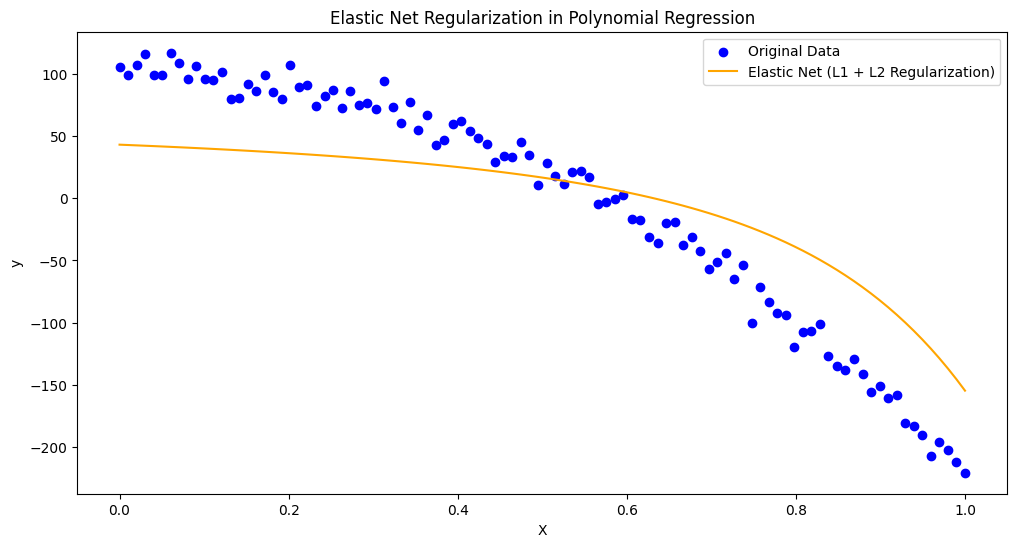

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Generate synthetic polynomial data
np.random.seed(42)
X = np.linspace(0, 1, 100).reshape(-1, 1)  # 100 points between 0 and 1
y = 28*X**3 - 385*X**2 + 39*X + 100 + np.random.randn(100, 1) * 10  # Cubic relationship with noise

# Define polynomial degree
degree = 10

# Create pipeline for Elastic Net Regularization
elastic_net_model = make_pipeline(
    PolynomialFeatures(degree),
    ElasticNet(alpha=1, l1_ratio=0.5, max_iter=10000)  # Alpha: regularization strength, l1_ratio: balance between L1 and L2
)
elastic_net_model.fit(X, y)
y_pred_elastic_net = elastic_net_model.predict(X)

# Plotting the results
plt.figure(figsize=(12, 6))

# Scatter plot of original data
plt.scatter(X, y, color="blue", label="Original Data")

# Plot predictions for Elastic Net model
plt.plot(X, y_pred_elastic_net, color="orange", label="Elastic Net (L1 + L2 Regularization)")

plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.title("Elastic Net Regularization in Polynomial Regression")
plt.show()